In [2]:
def index_in_list(a_list, index):
    return (index < len(a_list))
  

enter starting point: -2
enter ending point: 2
enter n: 100
           100           99          98         97       96        95
0.0006098 x   - 0.02312 x  + 0.7749 x  - 22.75 x  + 489 x  - 7419 x 
              94             93             92             91
 + 8.182e+04 x  - 6.854e+05 x  + 4.502e+06 x  - 2.195e+07 x 
              90             89             88             87
 + 3.537e+07 x  + 9.095e+08 x  - 1.521e+10 x  + 1.537e+11 x 
              86             85             84             83
 - 1.194e+12 x  + 7.661e+12 x  - 4.232e+13 x  + 2.075e+14 x 
              82           81             80             79
 - 9.246e+14 x  + 3.8e+15 x  - 1.449e+16 x  + 5.116e+16 x 
              78             77             76             75
 - 1.669e+17 x  + 5.025e+17 x  - 1.405e+18 x  + 3.701e+18 x 
              74            73            72             71
 - 9.372e+18 x  + 2.33e+19 x  - 5.75e+19 x  + 1.399e+20 x 
              70             69             68             67
 - 3.295e

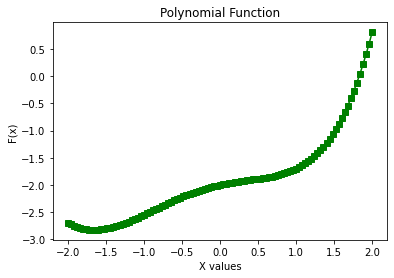

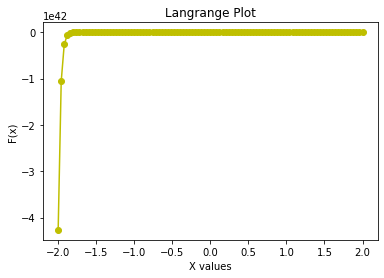

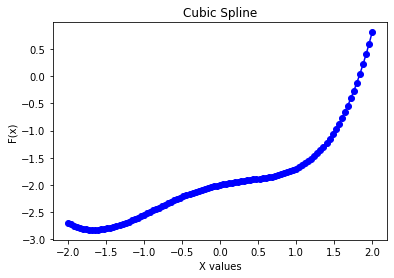

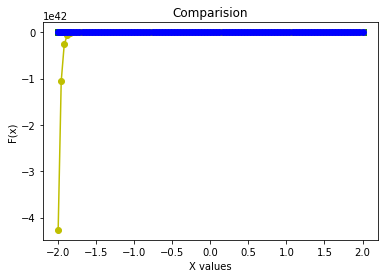

<Figure size 432x288 with 0 Axes>

In [6]:
from math import exp as e
from math import cos as cos
import math
from sympy import *
from math import *
from __future__ import division
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange
from scipy.interpolate import splrep
from scipy import interpolate

'''This code is to input the function, compute x values according to the given n
 and the y values of that function against those values'''

fx = '(exp(x) + 2**-x+ 2*cos(x) - 6)'
f= lambda x: eval(fx)
interval_start= input("enter starting point: ")
interval_end= input("enter ending point: ")
n= int(input("enter n: "))
x=[]
y_values=[]
difference= (int(interval_end) - int(interval_start))/int(n)
for i in range(n+1):
  x.append(int(interval_start) + i*difference)
for i in x:
  y_values.append(f(i))


'''This peice of code is to form the lagrange polynomial of the equation'''
poly = lagrange(x, y_values)
print(poly)
lang_vals=poly(x)

'''This peice of code is to form the cubic Spline function against the equation  values'''
c_s=splrep(x,y_values,s=0)
ynew = interpolate.splev(x, c_s, der=0)

"""This peice of code is to create a divided difference table in the TxT file"""
x_increment=0
dict = {'y':y_values}
diff = []
count = 0
while True:
 length = len(y_values)
 if length == 0:
   break
 for i in range(len(y_values)-1):
   diff.append(((y_values[i+1]-y_values[i])/(x[i+1+x_increment]-x[i])))
 
 y_values = diff
 diff=[]
 dict['y'+str(count)] = y_values
 count+=1
 x_increment+=1

file2 = open("Divied_Difference_Table.txt","w")
file2.write("x                                             ")
print(x)
'''for i in range(len(x)):
  file2.write(str(x[i])+"\n")'''
for key in dict.keys():
  file2.write(str(key) + "                                             ")

file2 = open("Divied_Difference_Table.txt","a")
file2.write("\n")
counter=0
while counter<len(dict)-1:
  file2.write(str(x[counter])+"                                    ")
  for data in dict.keys():
    if (index_in_list(dict[data],counter)==True):
     file2.write(str(dict[data][counter])+ "                      ")
  file2.write("\n")
  counter+=1

'''This peice of code is to show graphs of each equations seperately and a 
graph showing their comparisions also'''

'''Shows the function Graph'''
plt.plot(x,dict['y'],'gs-',  label='F(x)')
plt.title("Polynomial Function")
plt.xlabel("X values")
plt.ylabel("F(x)")
plt.show()
plt.clf()
'''Shows the lagrange graph'''
plt.plot(x,lang_vals, 'yo-', label='Langrange')
plt.title("Langrange Plot")
plt.xlabel("X values")
plt.ylabel("F(x)")
plt.show()
plt.clf()

'''Shows the cubic Spline graph'''
plt.plot(x,ynew, 'bo-', label='Langrange')
plt.title("Cubic Spline")
plt.xlabel("X values")
plt.ylabel("F(x)")
plt.show()
plt.clf()

'''Shows the comaprision of all graphs'''
plt.plot(x,dict['y'],'gs-',  label='F(x)')
plt.plot(x,lang_vals, 'yo-', label='Langrange')
plt.plot(x,ynew, 'bo-', label='Langrange')
plt.title("Comparision")
plt.xlabel("X values")
plt.ylabel("F(x)")
plt.show()
plt.clf()
